# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

# Load The Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


# Data Cleaning & Understanding

In [4]:
df.describe()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Exploratory Data Analysis (EDA)

1. Sales Distribution

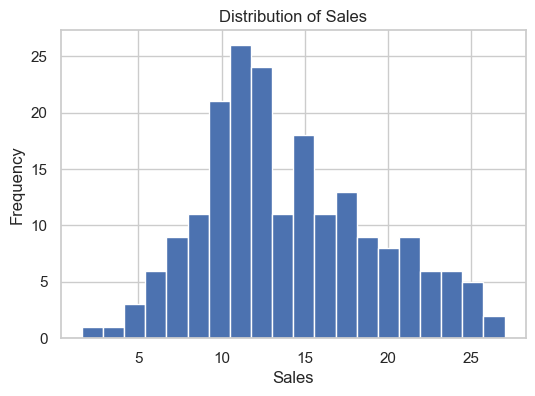

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df['Sales'], bins=20)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

2. TV Spend vs Sales

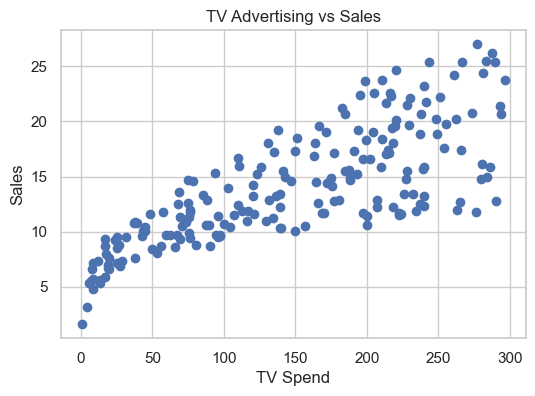

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['TV'], df['Sales'])
plt.title("TV Advertising vs Sales")
plt.xlabel("TV Spend")
plt.ylabel("Sales")
plt.show()

3. Radio Spend vs Sales

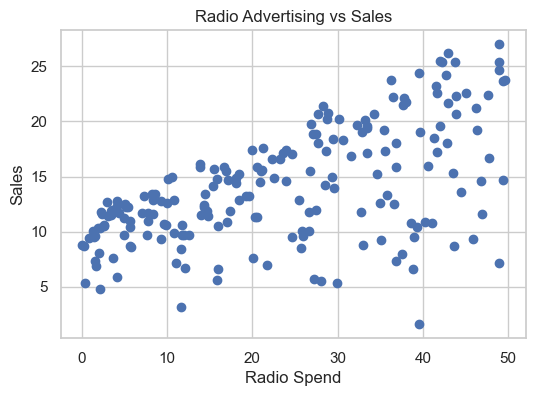

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(df['Radio'], df['Sales'])
plt.title("Radio Advertising vs Sales")
plt.xlabel("Radio Spend")
plt.ylabel("Sales")
plt.show()

4. Newspaper Spend vs Sales

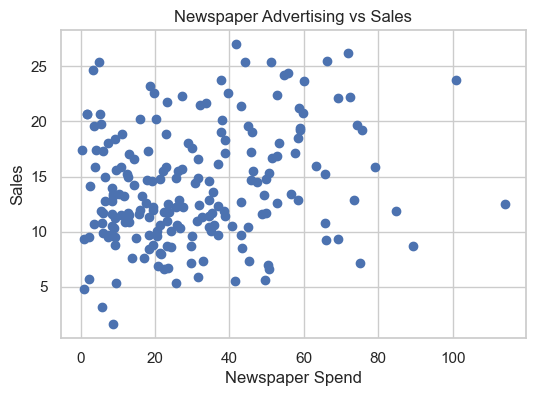

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(df['Newspaper'], df['Sales'])
plt.title("Newspaper Advertising vs Sales")
plt.xlabel("Newspaper Spend")
plt.ylabel("Sales")
plt.show()

5. Distribution of Sales

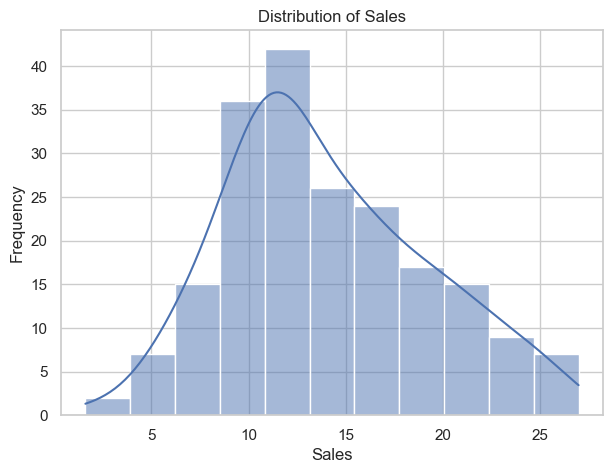

In [10]:
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

6. Correlation Heatmap

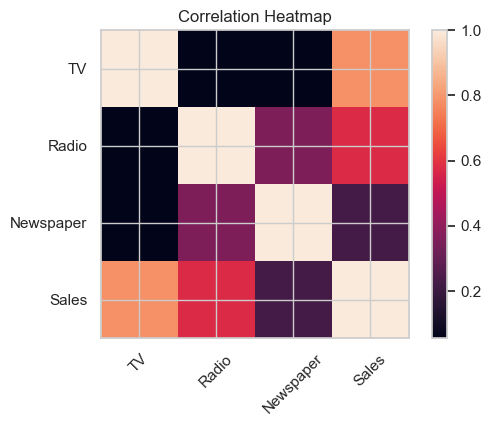

In [11]:
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(6,4))
plt.imshow(num_df.corr())
plt.colorbar()
plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=45)
plt.yticks(range(len(num_df.columns)), num_df.columns)
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection & Train-Test Split

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Building

1. Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

2. Random Forest Regressor

In [15]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [16]:
def eval_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:- \nMAE: {mae:.2f} Sales Units\nMSE  : {mse:.2f} (Units²)\nRMSE: {rmse:.2f} Sales Units\nR2: {r2*100:.2f}%\n")

eval_model("Linear Regression", y_test, y_pred_lr)
eval_model("Random Forest", y_test, y_pred_rf)

Linear Regression:- 
MAE: 1.25 Sales Units
MSE  : 2.58 (Units²)
RMSE: 1.61 Sales Units
R2: 90.29%

Random Forest:- 
MAE: 0.43 Sales Units
MSE  : 0.29 (Units²)
RMSE: 0.54 Sales Units
R2: 98.90%



# Visualization of Model Predictions

1. Actual vs Predicted Sales

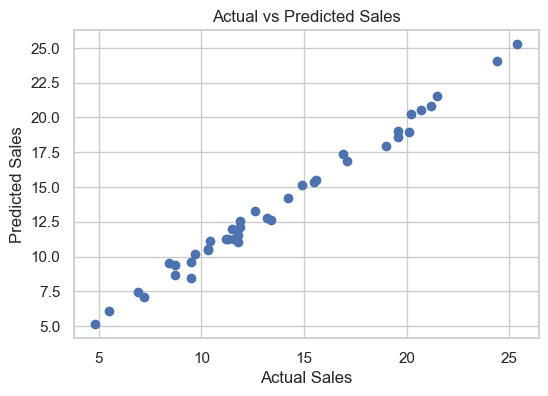

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

2. Prediction Error Distribution

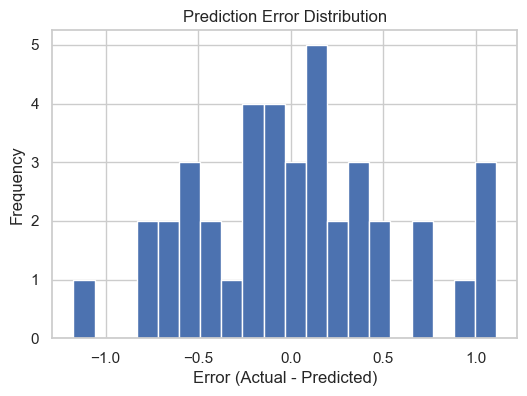

In [18]:
errors = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.hist(errors, bins=20)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

3. First 20 Predictions

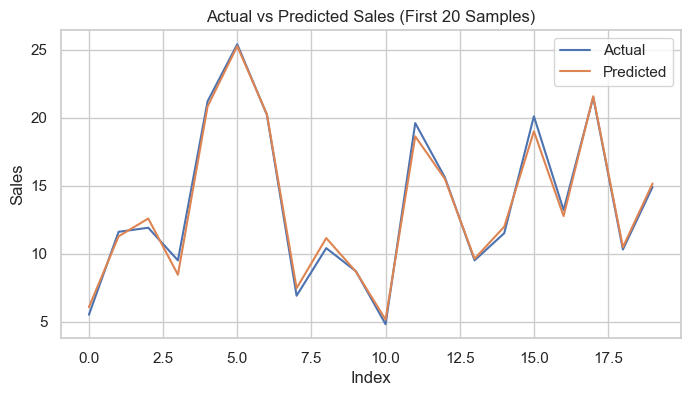

In [20]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values[:20], label="Actual")
plt.plot(y_pred_rf[:20], label="Predicted")
plt.title("Actual vs Predicted Sales (First 20 Samples)")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show()

4. Feature Importance

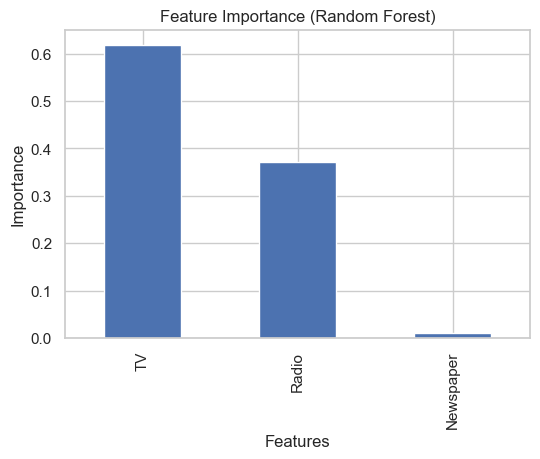

In [21]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(6,4))
feat_imp.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Prediction on New Data

In [22]:
new_data = pd.DataFrame({
    "TV": [120],
    "Radio": [30],
    "Newspaper": [15]
})

new_prediction = rf.predict(new_data)
print("Predicted Sales for New Campaign:", round(new_prediction[0], 2))

Predicted Sales for New Campaign: 14.48


# Visualization of New Data Prediction

Predicted Sales v/s Average Sales

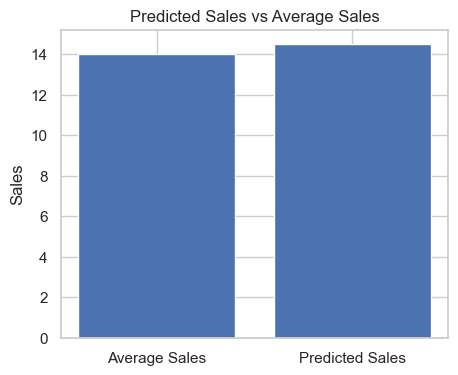

In [23]:
avg_sales = df['Sales'].mean()

plt.figure(figsize=(5,4))
plt.bar(["Average Sales", "Predicted Sales"], [avg_sales, new_prediction[0]])
plt.title("Predicted Sales vs Average Sales")
plt.ylabel("Sales")
plt.show()

Predicted Sales vs Each Advertising Channel

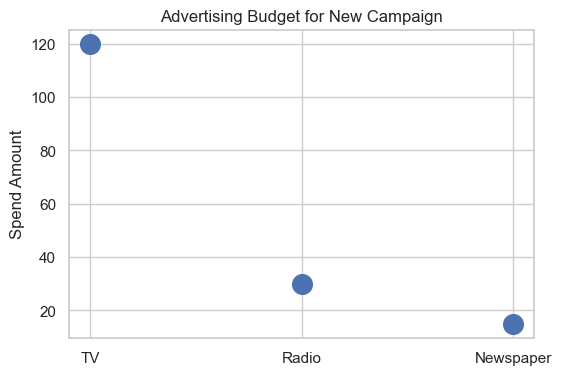

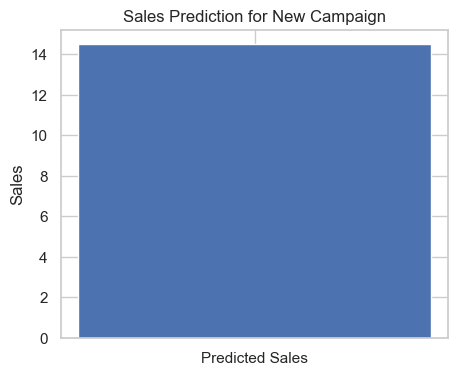

In [24]:
channels = ["TV", "Radio", "Newspaper"]
spends = new_data.iloc[0].values

plt.figure(figsize=(6,4))
plt.scatter(channels, spends, s=200)
plt.title("Advertising Budget for New Campaign")
plt.ylabel("Spend Amount")
plt.show()

plt.figure(figsize=(5,4))
plt.bar(["Predicted Sales"], [new_prediction[0]])
plt.title("Sales Prediction for New Campaign")
plt.ylabel("Sales")
plt.show()

Position of New Prediction Among Test Predictions

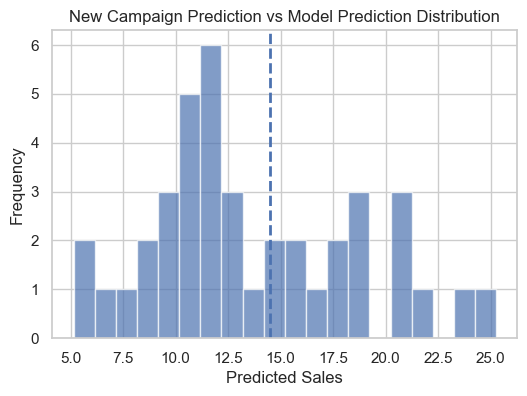

In [25]:
plt.figure(figsize=(6,4))
plt.hist(y_pred_rf, bins=20, alpha=0.7)
plt.axvline(new_prediction[0], linestyle='--', linewidth=2)
plt.title("New Campaign Prediction vs Model Prediction Distribution")
plt.xlabel("Predicted Sales")
plt.ylabel("Frequency")
plt.show()